In [10]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [11]:
from fastbook import *

In [12]:
from fastai.vision.all import *

In [23]:
path = Path("label")

In [24]:
print(path)

label


In [26]:
#path=(path/"labels_train.csv")
path = untar_data(URLs.PASCAL_2007)

[Path('/home/jupyter/.fastai/data/pascal_2012/train'), Path('/home/jupyter/.fastai/data/pascal_2012/valid.json'), Path('/home/jupyter/.fastai/data/pascal_2012/train.csv'), Path('/home/jupyter/.fastai/data/pascal_2012/segmentation'), Path('/home/jupyter/.fastai/data/pascal_2012/test'), Path('/home/jupyter/.fastai/data/pascal_2012/train.json')]


In [43]:
Path.BASE_PATH = path
# Path??

In [44]:
print(path.ls())

[Path('train'), Path('valid.json'), Path('train.csv'), Path('segmentation'), Path('test'), Path('train.json')]


In [48]:
dataFrame = pd.read_csv(path/"train.csv")
dataFrame.head()

,fname,labels,is_valid
0,2008_000002.jpg,tvmonitor,True
1,2008_000003.jpg,train person,True
2,2008_000007.jpg,boat,True
3,2008_000008.jpg,horse person,False
4,2008_000009.jpg,cow,True


In [50]:
dataFrame.iloc[:,0]

0        2008_000002.jpg
1        2008_000003.jpg
2        2008_000007.jpg
3        2008_000008.jpg
4        2008_000009.jpg
              ...       
11535    2011_003269.jpg
11536    2011_003271.jpg
11537    2011_003274.jpg
11538    2011_003275.jpg
11539    2011_003276.jpg
Name: fname, Length: 11540, dtype: object

In [51]:
dataFrame.iloc[:,1]

0           tvmonitor
1        train person
2                boat
3        horse person
4                 cow
             ...     
11535             car
11536          bottle
11537           train
11538       aeroplane
11539            bird
Name: labels, Length: 11540, dtype: object

In [52]:
dataFrame.iloc[:,2]

0         True
1         True
2         True
3        False
4         True
         ...  
11535     True
11536     True
11537    False
11538     True
11539    False
Name: is_valid, Length: 11540, dtype: bool

In [57]:
counter = 0
for i in dataFrame['is_valid']:
    if i==False:
        counter += 1
print(counter)

5717


In [59]:
counter/11540

0.49540727902946274

In [107]:
#print(dataFrame['is_valid'].size)
for i in range(dataFrame['is_valid'].size):
    if(dataFrame.iloc[i,2]==True):
        #print(dataFrame.iloc[i,2])
        valid = dataFrame[i,2].tolist()
    #print(i)
#     if(dataFrame.iloc[i,2]):
#         valid = dataFrame[i,2].tolist()
    
#     else:
#         train = dataFrame[i,2].tolist()
        
# print(train)
#     if d['is_valid'] == True :
#         train = d.tolist()
#     else:
#         valid = d.tolist()

KeyError: (0, 2)

In [124]:
# x in data block
# print((path/"train").ls())
def x(r):
    return path/"train"/r['fname']

In [126]:
x(dataFrame.iloc[2,:])
#print(dataFrame.iloc[2,:])

Path('train/2008_000007.jpg')

In [139]:
def y(r):
    return r.iloc[1].split(' ')

In [137]:
print((path).ls())

[Path('train'), Path('valid.json'), Path('train.csv'), Path('segmentation'), Path('test'), Path('train.json')]


In [141]:
y(dataFrame.iloc[56,:])

['cat', 'chair']

In [257]:
def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train,valid


In [162]:
#splitter(dataFrame.iloc[:,:])

In [163]:
dBlock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  get_x = x,
                  get_y = y,
                  splitter=splitter,
                  item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dBlock.dataloaders(dataFrame)

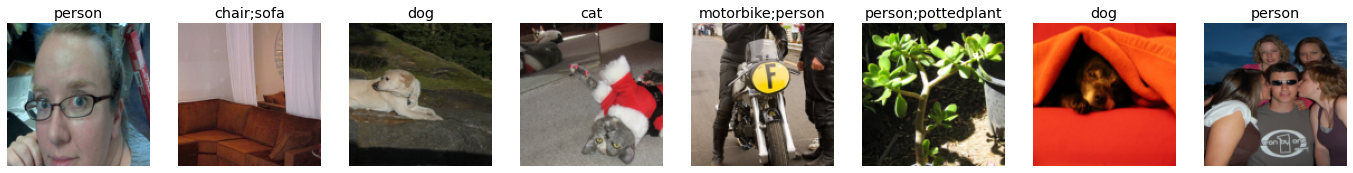

In [170]:
dls.show_batch(ncols=8,nrows=1)

In [181]:
learn = cnn_learner(dls, resnet18, metrics=accuracy_multi)
#learn.fine_tune(5)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.831144,0.511663,0.774661,00:18
1,0.463921,0.212088,0.952361,00:18
2,0.292157,0.180106,0.954165,00:18


In [183]:
learn = cnn_learner(dls, resnet18)
#learn.fine_tune(5)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,time
0,0.839091,0.536824,00:18
1,0.473758,0.225989,00:18
2,0.299047,0.190834,00:18


In [184]:
learn = cnn_learner(dls, resnet18)
learn.fine_tune(5)

epoch,train_loss,valid_loss,time
0,0.771318,0.366429,00:18


epoch,train_loss,valid_loss,time
0,0.363218,0.198435,00:18
1,0.209669,0.126764,00:18
2,0.152559,0.115337,00:18
3,0.127971,0.110619,00:18
4,0.118935,0.109241,00:18


In [194]:
dBlock1 = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  get_x = x,
                  get_y = y,
                  splitter=RandomSplitter(seed=42),
                  item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls1 = dBlock1.dataloaders(dataFrame)

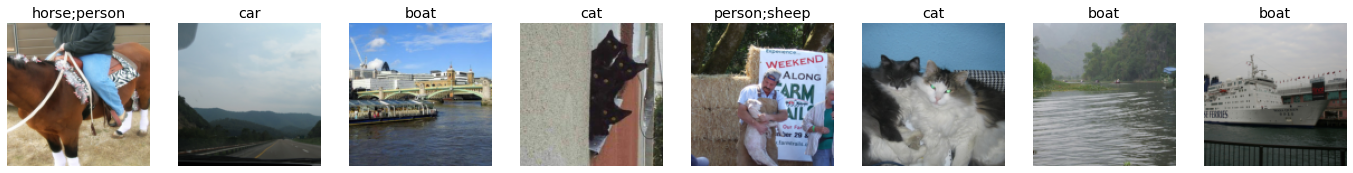

In [195]:
dls1.show_batch(ncols=8,nrows=1)

In [196]:
learn = cnn_learner(dls1, resnet18)
learn.fine_tune(5)

epoch,train_loss,valid_loss,time
0,0.550946,0.174865,00:17


epoch,train_loss,valid_loss,time
0,0.176449,0.121359,00:18
1,0.136473,0.110430,00:18
2,0.116223,0.105291,00:18
3,0.104785,0.102920,00:17
4,0.095731,0.102003,00:17


In [197]:
dBlock2 = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  get_x = x,
                  get_y = y,
                  splitter=RandomSplitter(seed=42),
                  item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls2 = dBlock2.dataloaders(dataFrame)

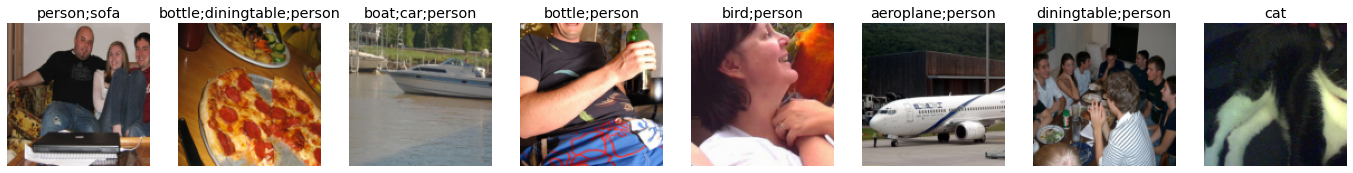

In [198]:
dls2.show_batch(ncols=8,nrows=1)

In [200]:
learn = cnn_learner(dls2, resnet18)
learn.fine_tune(5)

epoch,train_loss,valid_loss,time
0,0.544233,0.174165,00:18


epoch,train_loss,valid_loss,time
0,0.175644,0.122066,00:18
1,0.136207,0.110132,00:18
2,0.117892,0.104500,00:18
3,0.102645,0.101615,00:18
4,0.096274,0.101613,00:18


In [201]:
dBlock3 = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  get_x = x,
                  get_y = y,
                  splitter=RandomSplitter(seed=42),
                  item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls3 = dBlock3.dataloaders(dataFrame)

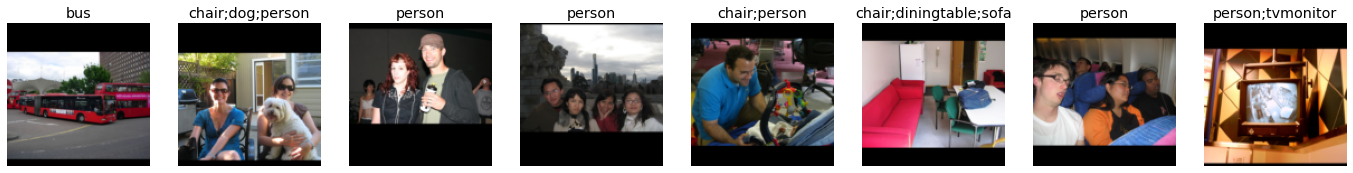

In [202]:
dls3.show_batch(ncols=8,nrows=1)

In [203]:
learn = cnn_learner(dls3, resnet18)
learn.fine_tune(5)

epoch,train_loss,valid_loss,time
0,0.569702,0.192468,00:20


epoch,train_loss,valid_loss,time
0,0.197495,0.141887,00:20
1,0.149924,0.126327,00:20
2,0.122339,0.120029,00:20
3,0.101879,0.116948,00:20
4,0.089347,0.116488,00:20


In [235]:
from random import seed
from random import randint

In [245]:
#putting 10% of the data aside as test set
def splitter2(df):
    test = []
    train = []
    valid = []
    if(randint(0, 10)==10):
        test = df.tolist()
    else:
        train = df.index[~df['is_valid']].tolist()
        valid = df.index[df['is_valid']].tolist()
    return train,valid,test


In [238]:
splitter(dataFrame.iloc[3,:])

([['fname', 'labels', 'is_valid']], [], [])

In [240]:
for i in range(15):
    print(splitter(dataFrame.iloc[i,:]))
    #print(randint(0, 10))

([], [['fname', 'labels', 'is_valid']], [])
3
([], [['fname', 'labels', 'is_valid']], [])
8
([], [['fname', 'labels', 'is_valid']], [])
5
([['fname', 'labels', 'is_valid']], [], [])
10
([], [['fname', 'labels', 'is_valid']], [])
3
([['fname', 'labels', 'is_valid']], [], [])
4
([], [['fname', 'labels', 'is_valid']], [])
8
([['fname', 'labels', 'is_valid']], [], [])
0
([], [], ['2008_000021.jpg', 'aeroplane', True])
3
([['fname', 'labels', 'is_valid']], [], [])
1
([], [], ['2008_000026.jpg', 'person dog', True])
7
([], [['fname', 'labels', 'is_valid']], [])
8
([['fname', 'labels', 'is_valid']], [], [])
8
([], [['fname', 'labels', 'is_valid']], [])
8
([['fname', 'labels', 'is_valid']], [], [])
0


In [241]:
dBlock4 = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  get_x = x,
                  get_y = y,
                  splitter=splitter2,
                  item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls4 = dBlock4.dataloaders(dataFrame)

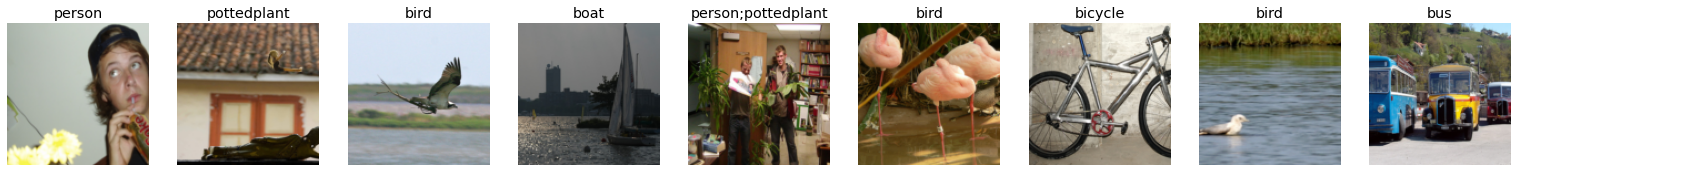

In [243]:
dls4.show_batch(nrows=1,ncols=10)

In [244]:
learn = cnn_learner(dls4, resnet18)
learn.fine_tune(5)

epoch,train_loss,valid_loss,time
0,0.763081,0.368253,00:22


epoch,train_loss,valid_loss,time
0,0.361119,0.197317,00:23
1,0.210838,0.126080,00:23
2,0.153320,0.114236,00:23
3,0.128825,0.110038,00:23
4,0.118281,0.108656,00:23


In [250]:
part_10 = dataFrame.sample(frac = 0.5) 
  
# Creating dataframe with  
# rest of the 50% values 
# rest_part_50 = df.drop(part_50.index) 
  

In [251]:
print(len(part_10))

5770


In [252]:
print(len(dataFrame))

11540


In [254]:
test_set = dataFrame.sample(frac=0.1)
dataFrame = df.drop(test_set.index)

In [256]:
print(len(dataFrame))
print(len(test_set))

10386
1154


In [262]:
print(dataFrame.iloc[3,:])

fname       2008_000008.jpg
labels         horse person
is_valid              False
Name: 3, dtype: object


In [271]:
dBlock5 = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  get_x = x,
                  get_y = y,
                  splitter=splitter,
                  item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls5 = dBlock5.dataloaders(dataFrame)

IndexError: positional indexers are out-of-bounds

In [270]:
# splitter(dataFrame)

In [265]:
dataFrameFull = pd.read_csv(path/"train.csv")

In [268]:
# splitter(dataFrameFull)